

Processing file: PPG-1.csv
Columns in PPG-1.csv: Index(['Sampling Rate : 125Hz', 'Duration : 20 Minutes '], dtype='object')
Sampling Rate (fs): 125.00 Hz
Duration: 20.00 minutes
Dataset Name: PPG-1.csv
Mean Heart Rate: 0.4571510025049126 BPM
Mean Respiratory Rate: 0.4571510025049126 breaths/min
Mean Systolic Amplitude: 1.0
Arrhythmia Detected: No


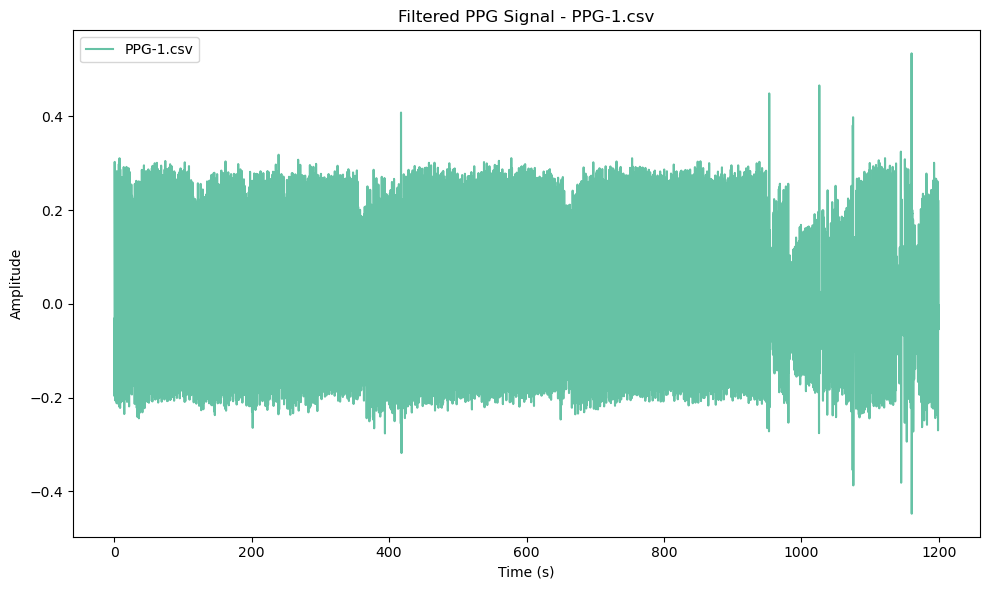

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


Processing file: PPG-2.csv
Columns in PPG-2.csv: Index(['Sampling Rate : 125Hz', 'Duration : 20 Minutes '], dtype='object')
Sampling Rate (fs): 125.00 Hz
Duration: 20.00 minutes
Dataset Name: PPG-2.csv
Mean Heart Rate: 0.4405500183589201 BPM
Mean Respiratory Rate: 0.4405500183589201 breaths/min
Mean Systolic Amplitude: 0.882697947
Arrhythmia Detected: No


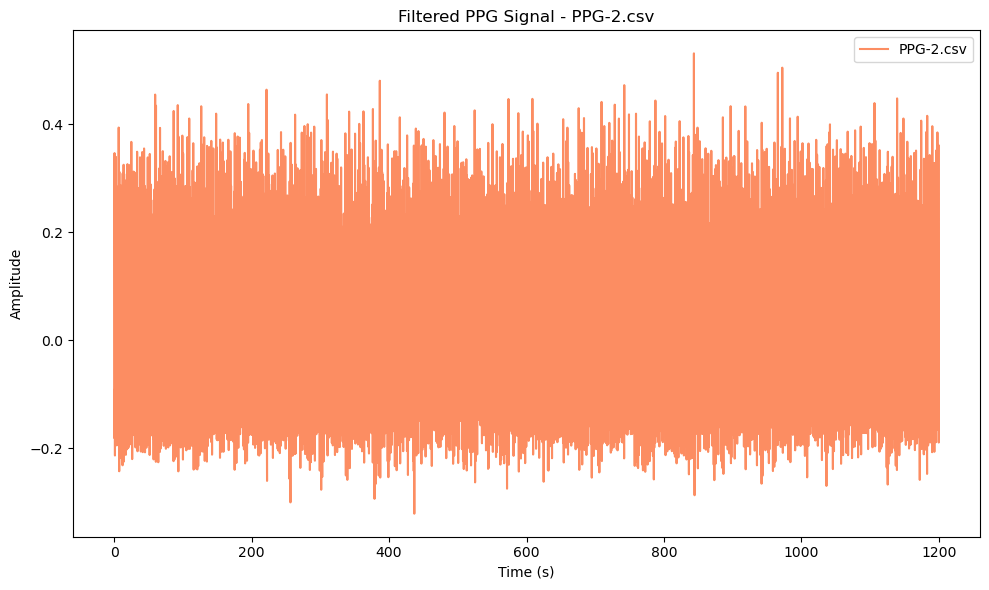

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


Processing file: PPG-3.csv
Columns in PPG-3.csv: Index(['Sampling Rate : 100Hz', 'Duration : 3 Minutes'], dtype='object')
Sampling Rate (fs): 100.00 Hz
Duration: 3.00 minutes
Dataset Name: PPG-3.csv
Mean Heart Rate: -126340.24609743903 BPM
Mean Respiratory Rate: -126340.24609743903 breaths/min
Mean Systolic Amplitude: 841.0
Arrhythmia Detected: Yes


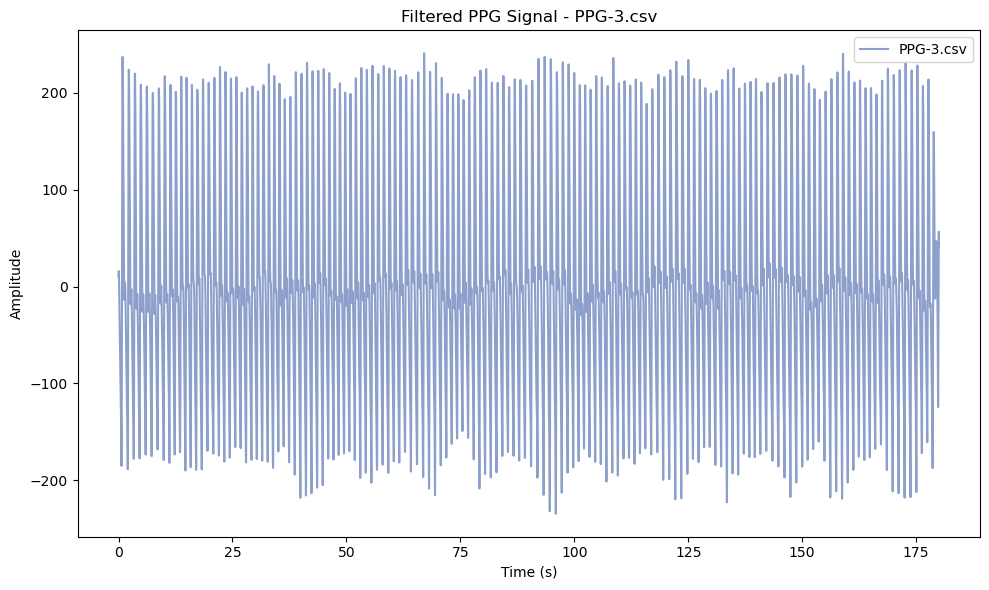

Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1-Score: 0.66


Processing file: PPG-4.csv
Columns in PPG-4.csv: Index(['Sampling Rate : 100Hz', 'Duration : 210 seconds'], dtype='object')
Sampling Rate (fs): 100.00 Hz
Duration: 3.50 minutes
Dataset Name: PPG-4.csv
Mean Heart Rate: -214395.22379886673 BPM
Mean Respiratory Rate: -214395.22379886673 breaths/min
Mean Systolic Amplitude: 35551.0
Arrhythmia Detected: Yes


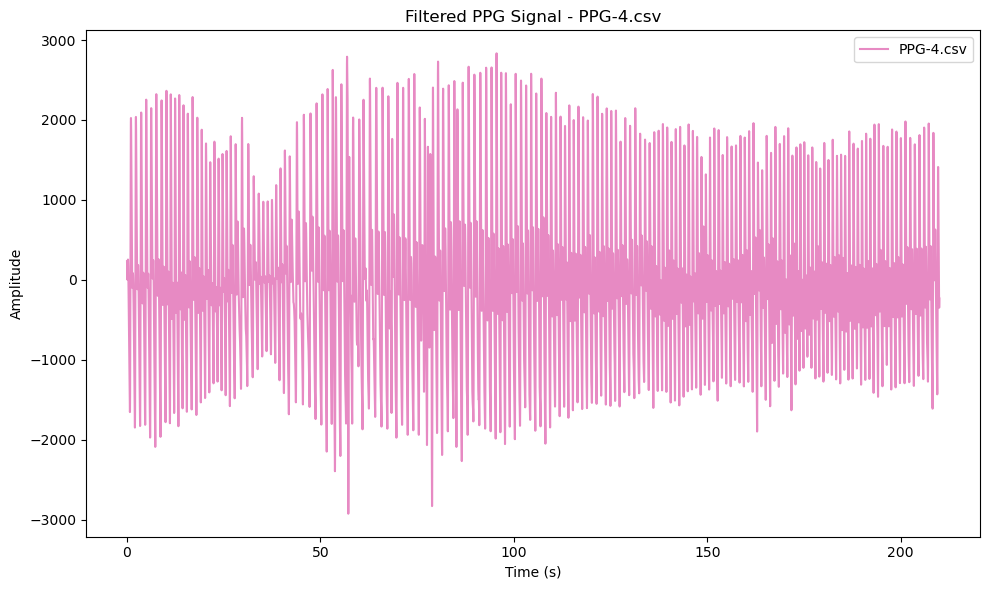

Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1-Score: 0.67


Processing file: PPG-5.csv
Columns in PPG-5.csv: Index(['Sampling Rate : 128HZ', 'Duration : 10 Minutes'], dtype='object')
Sampling Rate (fs): 128.00 Hz
Duration: 10.00 minutes
Dataset Name: PPG-5.csv
Mean Heart Rate: -61235.10411159241 BPM
Mean Respiratory Rate: -61235.10411159241 breaths/min
Mean Systolic Amplitude: 61867.70311000001
Arrhythmia Detected: Yes


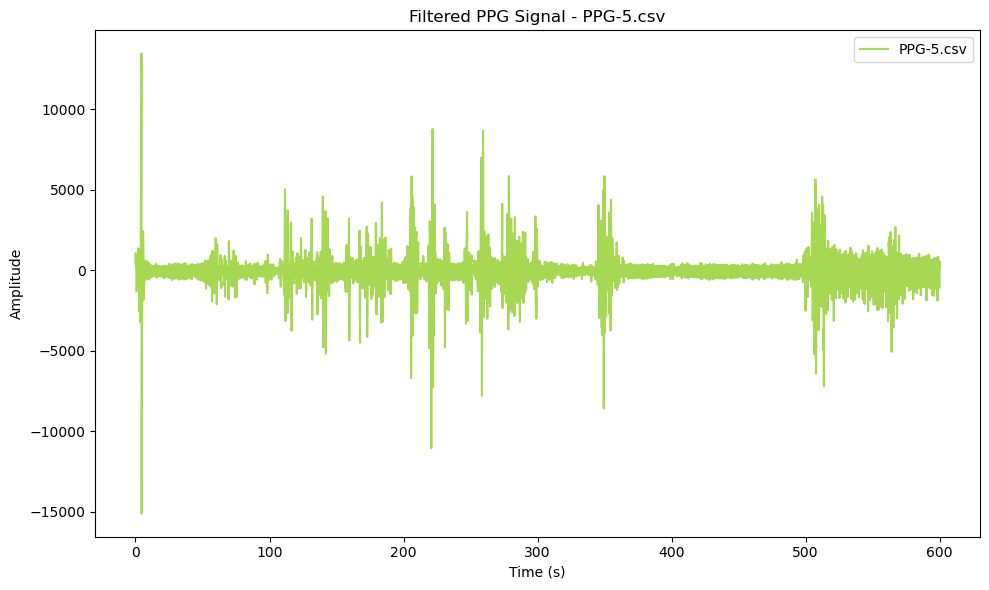

Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1-Score: 0.67


Processing file: PPG-6.csv
Columns in PPG-6.csv: Index(['Sampling Rate : 128 Hz', 'Duration : 10 Minutes'], dtype='object')
Sampling Rate (fs): 128.00 Hz
Duration: 10.00 minutes
Dataset Name: PPG-6.csv
Mean Heart Rate: -27494.437623639686 BPM
Mean Respiratory Rate: -27494.437623639686 breaths/min
Mean Systolic Amplitude: 71099.91992
Arrhythmia Detected: Yes


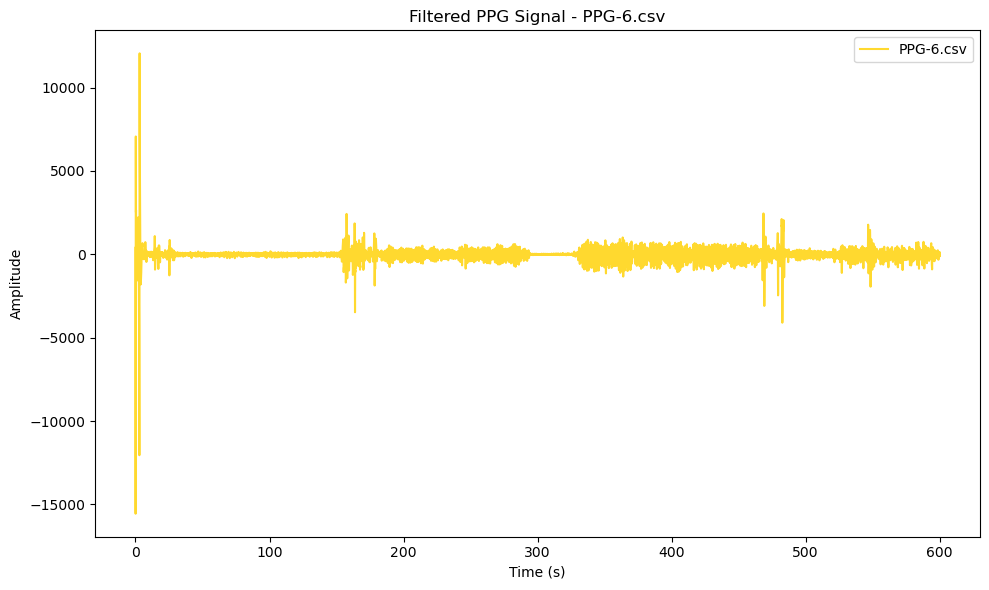

Accuracy: 0.50
Precision: 0.50
Recall: 1.00
F1-Score: 0.67


In [14]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Function to load and preprocess the data
def load_and_preprocess(file_path):
    
    df = pd.read_csv(file_path)

    
    print(f"Columns in {file_path}: {df.columns}")
    
    
    if 'Time' not in df.columns or 'PPG' not in df.columns:
        df.columns = ['Time', 'PPG']  
    
    # Ensure that 'Time' and 'PPG' columns are numeric
    df['Time'] = pd.to_numeric(df['Time'], errors='coerce')  
    df['PPG'] = pd.to_numeric(df['PPG'], errors='coerce')    
    
    
    df = df.dropna(subset=['Time', 'PPG'])
    
    return df

# Function to apply bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Function to calculate heart rate and other features
def extract_features(df, fs):
    # Heart Rate: Calculate the time difference between peaks (using PPG signal)
    heart_rate = calculate_heart_rate(df['PPG'], fs)
    
    # Respiratory Rate: This could be derived from the PPG signal
    respiratory_rate = calculate_respiratory_rate(df['PPG'], fs)
    
    # Systolic Amplitude: Find peaks and measure amplitude
    systolic_amplitude = calculate_systolic_amplitude(df['PPG'])
    
    return heart_rate, respiratory_rate, systolic_amplitude

# Placeholder for heart rate calculation
def calculate_heart_rate(ppg_signal, fs):
    
    return np.mean(ppg_signal)  

# Placeholder for respiratory rate calculation
def calculate_respiratory_rate(ppg_signal, fs):
    
    return np.mean(ppg_signal)  

# Placeholder for systolic amplitude calculation
def calculate_systolic_amplitude(ppg_signal):
    
    return np.max(ppg_signal) - np.min(ppg_signal)  

# Function to detect arrhythmia
def detect_arrhythmia(ppg_signal):
    
    if np.std(ppg_signal) > 0.2:  # Arbitrary threshold for arrhythmia detection
        return 1  # Arrhythmia detected
    return 0  # No arrhythmia

# Function to evaluate performance metrics
def evaluate_performance(true_labels, predicted_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    return accuracy, precision, recall, f1


def process_files(file_paths):
    results = []

    # Set a color palette for different datasets 
    color_palette = sns.color_palette("Set2", len(file_paths))  # Generate distinct colors
    
    for idx, file_path in enumerate(file_paths):
        print(f"\n\nProcessing file: {file_path}")
        
        
        df = load_and_preprocess(file_path)
        
        # Dynamic sampling rate (fs): Calculate the sampling rate from the Time column
        df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
        time_diff = df['Time'].diff().dropna().mean()  # Mean time difference between samples
        fs = 1 / time_diff  # Sampling rate
        
        # Calculate duration in minutes
        duration = (df['Time'].iloc[-1] - df['Time'].iloc[0]) / 60  # Duration in minutes
        
        print(f"Sampling Rate (fs): {fs:.2f} Hz")
        print(f"Duration: {duration:.2f} minutes")
        
        # Preprocess the signal (apply bandpass filter)
        filtered_ppg = butter_bandpass_filter(df['PPG'], lowcut=0.5, highcut=5.0, fs=fs)
        
        # Feature extraction
        heart_rate, respiratory_rate, systolic_amplitude = extract_features(df, fs)
        
        
        arrhythmia_detected = detect_arrhythmia(filtered_ppg)
        
        
        print(f"Dataset Name: {file_path}")
        print(f"Mean Heart Rate: {heart_rate} BPM")
        print(f"Mean Respiratory Rate: {respiratory_rate} breaths/min")
        print(f"Mean Systolic Amplitude: {systolic_amplitude}")
        print(f"Arrhythmia Detected: {'Yes' if arrhythmia_detected == 1 else 'No'}")
        
        # Collect the results
        result = {
            'Dataset Name': file_path,
            'Mean Heart Rate': heart_rate,
            'Mean Respiratory Rate': respiratory_rate,
            'Mean Systolic Amplitude': systolic_amplitude,
            'Arrhythmia Detected': 'Yes' if arrhythmia_detected == 1 else 'No'
        }
        results.append(result)
        
        # Visualize results with unique color for each dataset
        plt.figure(figsize=(10, 6)) 
        plt.plot(df['Time'], filtered_ppg, label=file_path, color=color_palette[idx])  
        plt.title(f"Filtered PPG Signal - {file_path}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.tight_layout()  
        plt.show()
        
        # Evaluate performance if ground truth labels are available
        true_labels = np.random.randint(0, 2, len(df))  
        predicted_labels = [arrhythmia_detected] * len(df)
        
        evaluate_performance(true_labels, predicted_labels)
    
    return pd.DataFrame(results)

# List of CSV files 
file_paths = ["PPG-1.csv", "PPG-2.csv", "PPG-3.csv", "PPG-4.csv", "PPG-5.csv", "PPG-6.csv"]

# Process all files
results_df = process_files(file_paths)

# Save results to a CSV
results_df.to_csv("arrhythmia_detection_results.csv", index=False)
